In [2]:
from src import utils
from src import preprocessing
from src import processing
from src import deep_learning_module
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from fastbook import *
from ipywidgets import interact, interactive, fixed, interact_manual

In [4]:
importlib.reload(utils)

df = utils.load_data(
                path_data="data/",
                name_csv_features="features.csv",
                name_csv_labels="labels.csv",
                delay=150,
                labeled_data_step=600000,
                )

In [5]:
importlib.reload(preprocessing)

data_arr = preprocessing.conver_datframe_to_numpy(
                        df,
                        columns=["X", "Y", "Z"],
                        debug=True,
                        )
                        
label_arr = preprocessing.conver_datframe_to_numpy(
                        df,
                        columns=["label"],
                        debug=True,
                        )

The columns are  (600000, 3)
The columns are  (600000, 1)


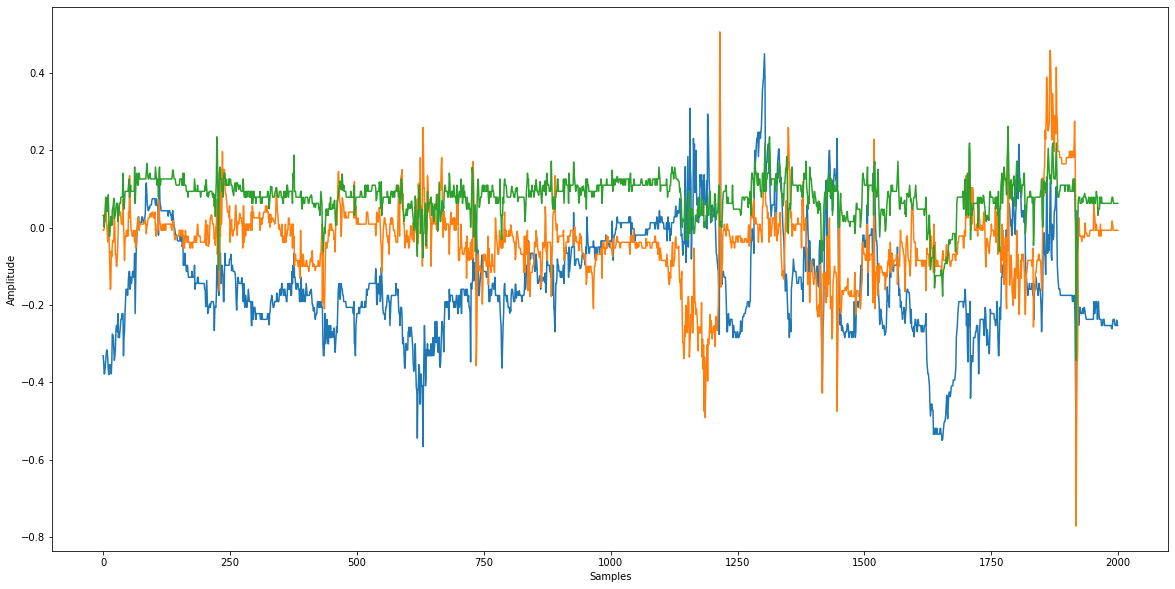

In [6]:
importlib.reload(preprocessing)
detrend = preprocessing.detrend_signal( signal = data_arr,
                                        type_detrend = "LINEAR"
                                        )

start = 5000
end = 7000
plt.figure(figsize=(20,10))
plt.plot(detrend[start:end])
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot();

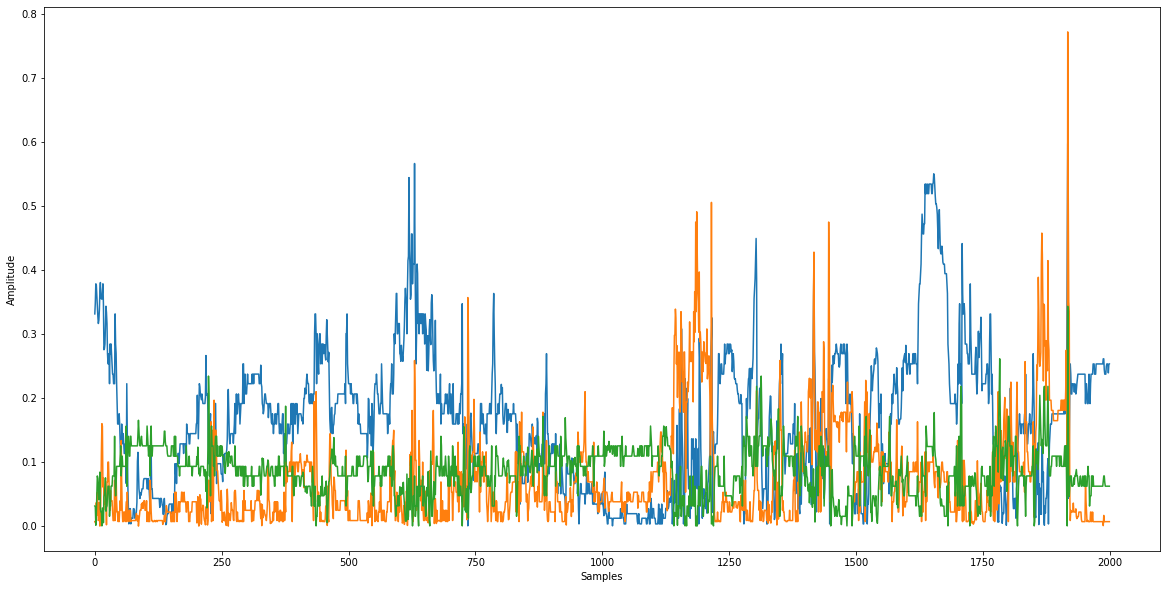

In [7]:
importlib.reload(preprocessing)
absolute_value = preprocessing.absolute_value(detrend)

start = 5000
end = 7000
plt.figure(figsize=(20,10))

plt.plot(absolute_value[start:end]);
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot();          

In [8]:
def graph_interact(start, end):
    """This function create a interactive graph with the data

    :param start: start point of the graph
    :type start: int
    :param end: end point of the graph
    :type end: int
    :param data: data to plot
    :type data: np.ndarray or pd.DataFrame
    """
    plt.figure(figsize=(20,10))
    plt.plot(absolute_value[start:end]);
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.plot();
    return
interact(graph_interact, start=5000, end=6000)

interactive(children=(IntSlider(value=5000, description='start', max=15000, min=-5000), IntSlider(value=6000, …

<function __main__.graph_interact(start, end)>

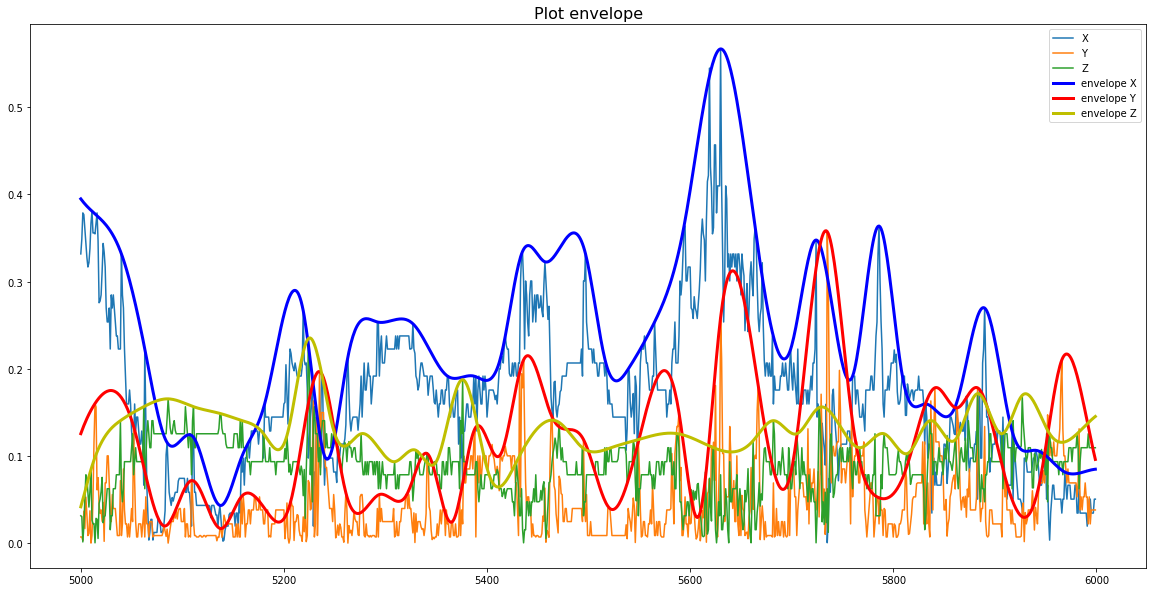

In [9]:
# Parameter interpolation ----------------------------------------------
interpolation = 20

importlib.reload(preprocessing)
data_eng = preprocessing.envelope(
                                    data = absolute_value,
                                    distance=interpolation
                                    )
# data_eng[1].shape

a = preprocessing.envelope_aux(absolute_value, interpolation)
x = np.arange(len(data_arr))

# Visualization interpolation  ----------------------------------------------
graph = True
start = 5000
end = 6000
if graph:
    # plot a
    plt.figure(figsize=(20,10))
    plt.title('Plot envelope',fontsize=16)
    plt.plot(x[start:end], absolute_value[start:end], label='envelope')
    plt.plot(x[start:end], a[0][start:end],color='b',linewidth=3)   
    plt.plot(x[start:end], a[1][start:end],color='r',linewidth=3)
    plt.plot(x[start:end], a[2][start:end],color='y',linewidth=3)
    # plt.plot(x[start:end], label_arr[start:end],color='black',linewidth=3)
    # legend column 1 is X, column 2 is Y, column 3 is Z
    plt.legend(['X', 'Y', 'Z','envelope X', 'envelope Y', 'envelope Z', 'label'], loc='upper right')
    plt.show()

In [10]:
importlib.reload(utils)
# Data engineering ----------------------------------------------
names_new_columns = [f'x_env_{interpolation}',f'y_env_{interpolation}',f'z_env_{interpolation}']
new_df = utils.arr_to_dataframe(data_eng, df, names_new_columns)
new_df.head()

,x_env_20,y_env_20,z_env_20,X,Y,Z,label
0,0.000000,0.000000,0.000000,-0.062,-0.250,0.000,0
1,0.005964,0.006886,-0.028234,-0.062,-0.203,-0.031,0
2,0.012823,0.014563,-0.050050,-0.047,-0.219,0.047,0
3,0.020518,0.022991,-0.065758,-0.078,-0.188,-0.016,0
4,0.028989,0.032130,-0.075666,-0.078,-0.172,-0.031,0


In [10]:
# optional
new_df.to_csv(f'data/features_eng_{interpolation}.csv', index=False)

In [11]:
# red features_eng_*.csv
df_25 = pd.read_csv('data/features_eng_25.csv')
df_50 = pd.read_csv('data/features_eng_50.csv')
df_10 = pd.read_csv('data/features_eng_10.csv')

# df_50.head()
drop_columns = ['X', 'Y', 'Z', 'label']
df_10.drop(drop_columns, axis=1, inplace=True)
df_25.drop(drop_columns, axis=1, inplace=True)
df_50.drop(drop_columns, axis=1, inplace=True)

concat_df = pd.concat([df_10, df_25, df_50, df], axis=1)

concat_df_columns = concat_df.columns[:-1]

In [13]:
from src import preprocessing
import importlib
import seaborn as sns
import warnings

importlib.reload(preprocessing)
columns_scale = concat_df_columns
columns_labels = ["label"]
df_sc = preprocessing.normalize_data( concat_df,
                        columns_scale=columns_scale, 
                        columns_no_scale=columns_labels, 
                        is_dataframe=True, 
                        type_normalization="MinMaxScaler"
                        )
graph = False
if graph:
    print(df_sc["label"].value_counts())
    class_names = ['Normal event','Reproductive event','Interest event']
    ax = sns.countplot(x="label", data=df_sc)
    ax.set_xticklabels(class_names); 
    # use percentage instead of count
    total = len(df_sc.label)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y))
        # ignore Future warnings
        warnings.simplefilter(action='ignore', category=FutureWarning)


In [14]:
df_sc.head()

,label,x_env_10,y_env_10,z_env_10,x_env_25,y_env_25,z_env_25,x_env_50,y_env_50,z_env_50,X,Y,Z
0,0,0.196300,0.207526,0.239150,0.118924,0.151711,0.219126,0.133975,0.119918,0.202708,0.502462,0.463158,0.757938
1,0,0.202199,0.208944,0.245677,0.127726,0.155433,0.222328,0.136926,0.131656,0.214121,0.502462,0.476177,0.750064
2,0,0.207887,0.210751,0.251454,0.136010,0.159410,0.225793,0.139922,0.143019,0.225162,0.506806,0.471745,0.769876
3,0,0.213377,0.212928,0.256555,0.143795,0.163627,0.229507,0.142961,0.154011,0.235835,0.497828,0.480332,0.753874
4,0,0.218682,0.215459,0.261055,0.151103,0.168070,0.233458,0.146040,0.164638,0.246144,0.497828,0.484765,0.750064


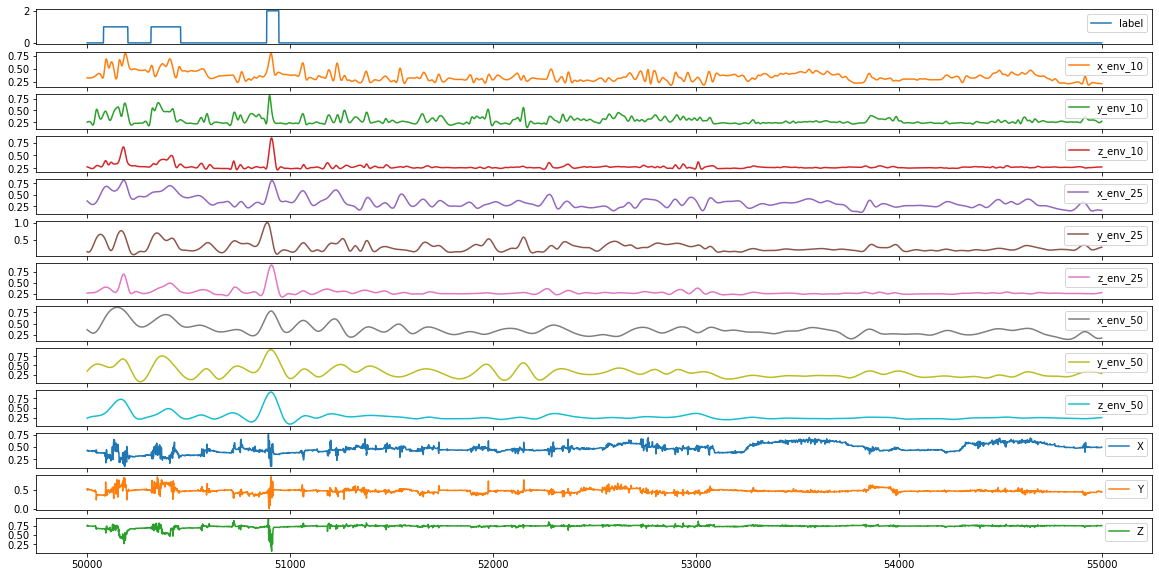

In [15]:
start = 50000
end = 55000
graph_size = (20,10)
df_sc[start:end].plot(subplots=True, figsize=graph_size)
plt.show()

In [20]:
importlib.reload(preprocessing)
# Data processing -------------------------------------------
interpolation = 20
arr_0, arr_1, arr_2, min_class = preprocessing.split_windows(
                                                        df_sc, 
                                                        width_windows = 20, 
                                                        stride_windows =20, 
                                                        debug=True
                                                        )

--------------------Numbers of windows per class---------------------
Number of windows with normal behavior :  29278 
Number of windows with reproductive event :   229 
Number of windows with event of interest :   493 


The minimum number of windows per class is :  229 


----Numbers of windows per class before balanced data-----
Number of windows with normal behavior :  229 
Number of windows with reproductive event :   229 
Number of windows with event of interest :   229 


-----------before balanced----------------
Number of windows with normal behavior :  229 
Number of windows with reproductive event :   229 
Number of windows with event of interest :   229 



 Number of windows with normal behavior :  229 
 The shape of each window is :  (20, 12) 
 The shape of the array is :  (229, 20, 12) 
 The type of each window is :  <class 'numpy.ndarray'> 



 Number of windows with reproductive event :  229 
 The shape of each window is :  (20, 12) 
 The shape of the array is :  (229,

In [21]:
from src import utils
import importlib

# reload the module
importlib.reload(utils)
# # generate labels data ----------------------------------------------
y_train_0, y_train_1, y_train_2 = utils.create_labels(min_class, debug=False)

In [25]:
importlib.reload(processing)


# # split data --------------------------------------------------------
X_train, X_test, y_train, y_test = processing.split_data(
                        (arr_0, arr_1, arr_2), 
                        (y_train_0, y_train_1, y_train_2), 
                        debug=True
                        )


------------X_train.shape-----------------
X_train_0 shape :  (183, 20, 12) 
 X_train_1 shape :  (183, 20, 12) 
 X_train_2 shape :  (183, 20, 12) 

------------X_test.shape---------------
X_test_0 shape :  (46, 20, 12) 
 X_test_1 shape :  (46, 20, 12) 
 X_test_2 shape :  (46, 20, 12) 

------------y_train.shape-----------------
y_train_0 shape :  (183,) 
 y_train_1 shape :  (183,) 
 y_train_2 shape :  (183,) 

------------y_test.shape---------------
y_test_0 shape :  (46,) 
 y_test_1 shape :  (46,) 
 y_test_2 shape :  (46,) 

------------X_train.shape-----------------
X_train shape :  (549, 20, 12) 

------------X_test.shape-------------------
X_test shape :  (138, 20, 12) 

------------y_train.shape-------------------
y_train shape :  (549,) 

------------y_test.shape--------------------
y_test shape :  (138,) 



In [26]:
importlib.reload(deep_learning_module)

# # reshape data --------------------------------------------------------
num_classes = 3 #cantidad de clases 
input_shape_dataset = (X_train.shape[1], X_train.shape[2], 1)

print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")

X_train, X_test = deep_learning_module.reshape_data_cnn(X_train, X_test, debug=False)

print(f"x_train reshape: {X_train.shape} - y_train reshape: {y_train.shape}")

x_train shape: (549, 20, 12) - y_train shape: (549,)
x_test shape: (138, 20, 12) - y_test shape: (138,)
x_train reshape: (549, 20, 12, 1) - y_train reshape: (549,)


INFO:tensorflow:Assets written to: C:\Users\crist\AppData\Local\Temp\tmp0sd03e_v\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\crist\AppData\Local\Temp\tmp0sd03e_v\model\data\model\assets


5/5 [==============================] - 0s 2ms/step


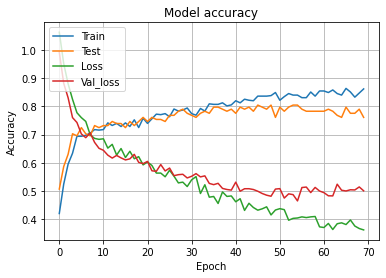

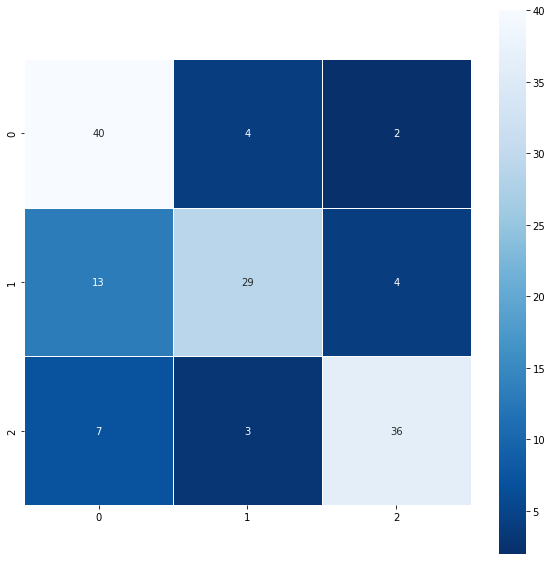

In [27]:
from src import deep_learning_module
import importlib

importlib.reload(deep_learning_module)
history = deep_learning_module.run_experiment_cnn(  input_shape_dataset,
                                                    X_train, 
                                                    y_train, 
                                                    X_test, 
                                                    y_test,
                                                    experiment_name = 'CNN_test',
                                                    epochs=70, 
                                                    # batch_size=8, 
                                                    debug=False,
                                                    optimizer = Adam,
                                                    learning_rate=0.001,
                                                    metrics = ['accuracy'],
                                                    loss = 'sparse_categorical_crossentropy',
                                                    filters_cnn_base = [16, 32],)
